# Cleaning

In [58]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from datetime import datetime
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 1.21 ms (started: 2022-12-10 17:26:09 -08:00)


In [59]:
sns.set_theme()
df = pd.read_csv("AAPL.csv")
pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", None)

time: 5.46 ms (started: 2022-12-10 17:26:09 -08:00)


In [60]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2008-12-10,3.495357,3.553214,3.446429,3.507500,2.989855,938047600
1,2008-12-11,3.476786,3.615714,3.386786,3.392857,2.892132,1040617200
2,2008-12-12,3.314286,3.535714,3.304643,3.509643,2.991682,1041174400
3,2008-12-15,3.428214,3.436071,3.321429,3.383929,2.884522,891758000
4,2008-12-16,3.356429,3.445714,3.312500,3.408214,2.905223,1093506400


time: 3.28 ms (started: 2022-12-10 17:26:09 -08:00)


In [61]:
def dConditions(s):
    if (s['Open'] > s['Close']):
        return "Down"
    elif (s['Close'] > s['Open']):
        return "Up"
    elif (s['Open'] == s['Close']):
        return "Stagnant"
    else:
        return "Error"

time: 302 µs (started: 2022-12-10 17:26:09 -08:00)


In [62]:
df['Direction'] = df.apply(dConditions, axis=1)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Direction
0,2008-12-10,3.495357,3.553214,3.446429,3.507500,2.989855,938047600,Up
1,2008-12-11,3.476786,3.615714,3.386786,3.392857,2.892132,1040617200,Down
2,2008-12-12,3.314286,3.535714,3.304643,3.509643,2.991682,1041174400,Up
3,2008-12-15,3.428214,3.436071,3.321429,3.383929,2.884522,891758000,Down
4,2008-12-16,3.356429,3.445714,3.312500,3.408214,2.905223,1093506400,Up


time: 30.5 ms (started: 2022-12-10 17:26:09 -08:00)


In [63]:
df['Datetime'] = pd.to_datetime(df['Date'])
df['DayName'] = df['Datetime'].dt.day_name()
df['Month'] = df['Datetime'].dt.month_name()
df['Year'] = pd.DatetimeIndex(df['Datetime']).year
df['Day'] = pd.DatetimeIndex(df['Datetime']).day
df['pOpen'] = df['Open'].shift(1)
df['pClose'] = df['Close'].shift(1)
df['pAdjClose'] = df['Adj Close'].shift(1)
df['pLow'] = df['Low'].shift(1)
df['pHigh'] = df['High'].shift(1)
df['pVolume'] = df['Volume'].shift(1)
df['pDay'] = df['Day'].shift(1)
df['pYear'] = df['Year'].shift(1)
df['pMonth'] = df['Month'].shift(1)
df['pDayName'] = df['DayName'].shift(1)
df['pDirection'] = df['Direction'].shift(1)
df['pDatetime'] = df['Datetime'].shift(1)
df['pDate'] = df['Date'].shift(1)
df = df.tail(-1)
df.head()
df_en = df.copy()

time: 12.6 ms (started: 2022-12-10 17:26:09 -08:00)


In [64]:
df_en = df_en.replace({'DayName' : { 
                                    'Monday' : 0,
                                    'Tuesday' : 1,
                                    'Wednesday' : 2,
                                    'Thursday' : 3,
                                    'Friday' : 4,
                                    'Saturday' : 5,
                                    'Sunday' : 6
                                    }})
df_en = df_en.replace({'Direction' : { 
                                    'Down' : 0,
                                    'Up' : 1,
                                    'Stagnant' : 2
                                    }})
df_en['Month'] = pd.DatetimeIndex(df['Datetime']).month
df_en = df_en.replace({'pDayName' : { 
                                    'Monday' : 0,
                                    'Tuesday' : 1,
                                    'Wednesday' : 2,
                                    'Thursday' : 3,
                                    'Friday' : 4,
                                    'Saturday' : 5,
                                    'Sunday' : 6
                                    }})
df_en = df_en.replace({'pDirection' : { 
                                    'Down' : 0,
                                    'Up' : 1,
                                    'Stagnant' : 2
                                    }})
df_en['pMonth'] = pd.DatetimeIndex(df['pDatetime']).month
df_en.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Direction,Datetime,DayName,Month,Year,Day,pOpen,pClose,pAdjClose,pLow,pHigh,pVolume,pDay,pYear,pMonth,pDayName,pDirection,pDatetime,pDate
1,2008-12-11,3.476786,3.615714,3.386786,3.392857,2.892132,1040617200,0,2008-12-11,3,12,2008,11,3.495357,3.507500,2.989855,3.446429,3.553214,9.380476e+08,10.0,2008.0,12,2,1,2008-12-10,2008-12-10
2,2008-12-12,3.314286,3.535714,3.304643,3.509643,2.991682,1041174400,1,2008-12-12,4,12,2008,12,3.476786,3.392857,2.892132,3.386786,3.615714,1.040617e+09,11.0,2008.0,12,3,0,2008-12-11,2008-12-11
3,2008-12-15,3.428214,3.436071,3.321429,3.383929,2.884522,891758000,0,2008-12-15,0,12,2008,15,3.314286,3.509643,2.991682,3.304643,3.535714,1.041174e+09,12.0,2008.0,12,4,1,2008-12-12,2008-12-12
4,2008-12-16,3.356429,3.445714,3.312500,3.408214,2.905223,1093506400,1,2008-12-16,1,12,2008,16,3.428214,3.383929,2.884522,3.321429,3.436071,8.917580e+08,15.0,2008.0,12,0,0,2008-12-15,2008-12-15
5,2008-12-17,3.251071,3.253571,3.143571,3.184286,2.714344,1293860400,0,2008-12-17,2,12,2008,17,3.356429,3.408214,2.905223,3.312500,3.445714,1.093506e+09,16.0,2008.0,12,1,1,2008-12-16,2008-12-16


time: 23.9 ms (started: 2022-12-10 17:26:09 -08:00)


# Charts

<AxesSubplot:>

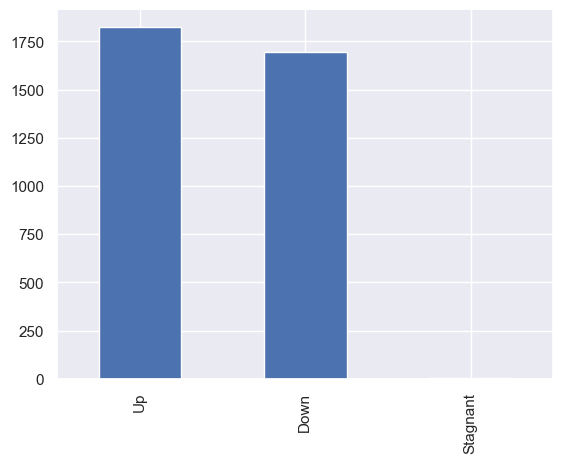

time: 78.8 ms (started: 2022-12-10 17:26:09 -08:00)


In [65]:
df['Direction'].value_counts().plot.bar()

<AxesSubplot:xlabel='DayName'>

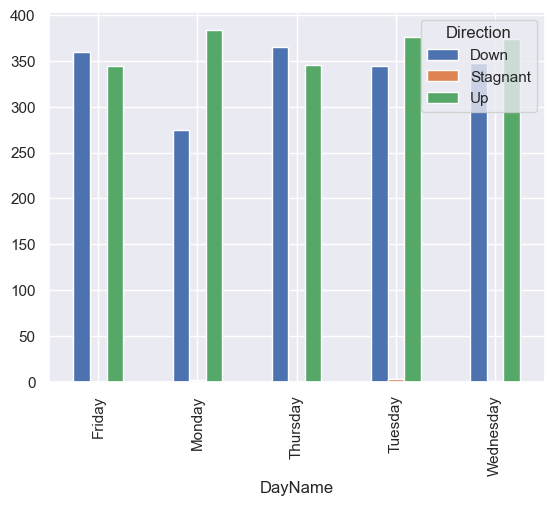

time: 108 ms (started: 2022-12-10 17:33:21 -08:00)


In [74]:
pd.crosstab(df['DayName'], df['Direction']).plot.bar()

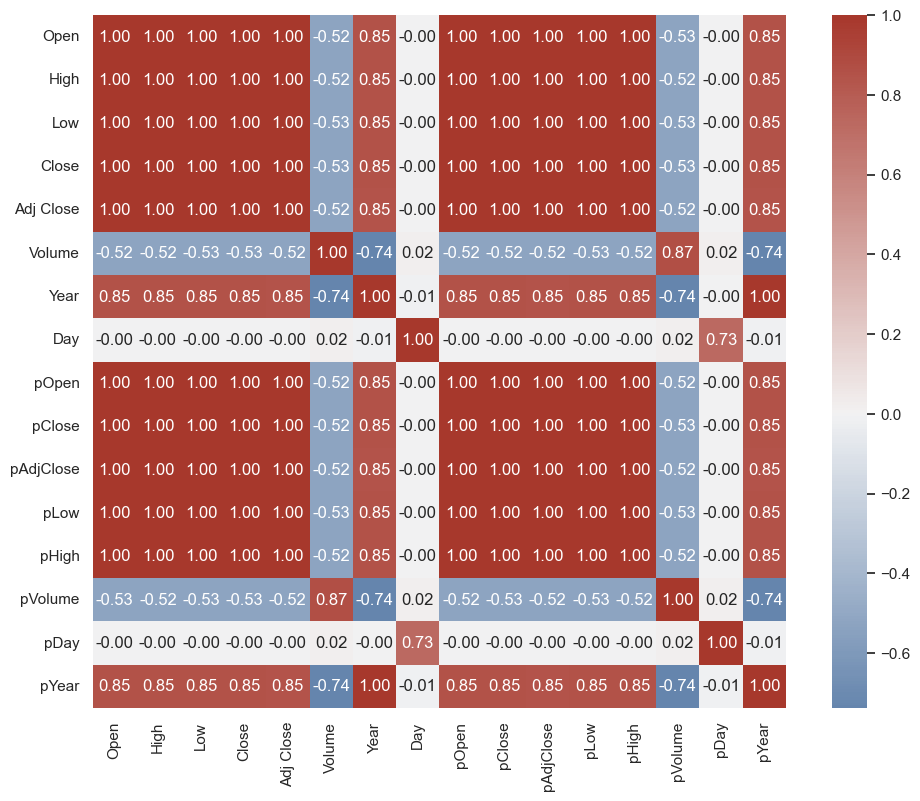

time: 534 ms (started: 2022-12-10 17:17:58 -08:00)


In [ ]:
corr = df.corr()

plt.figure(figsize=(12,9))

cmap = sns.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True)

_ = sns.heatmap(corr, center=0, annot=True, 
                fmt='.2f', square=True, cmap=cmap)

<AxesSubplot:>

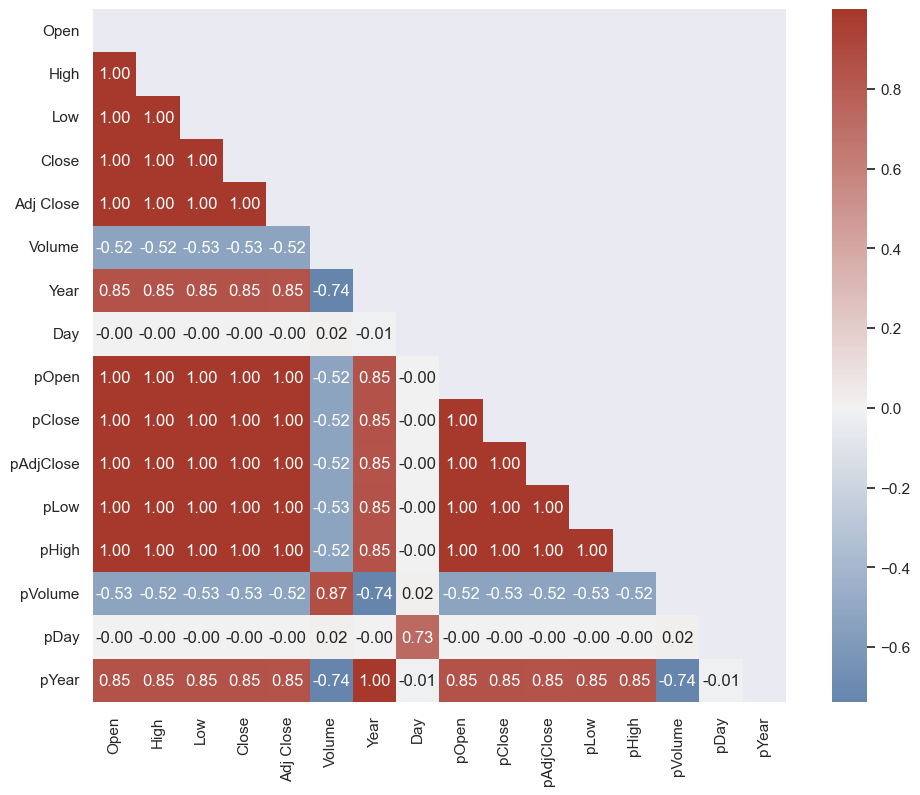

time: 363 ms (started: 2022-12-10 17:17:59 -08:00)


In [ ]:
plt.figure(figsize=(12,9))

mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, mask=mask, center=0, annot=True,
             fmt='.2f', square=True, cmap=cmap)

# Analysis

# Predictions

In [ ]:
df_en_train = df_en.loc[:(len(df_en)*.8)].copy()
df_en_test = df_en.loc[((len(df_en)*.8)+1):].copy()

X_train = df_en_train[["pDayName", "pOpen", "pClose", "pHigh", "pLow", "pAdjClose", "pVolume", "pYear", "pMonth", "pDay", "pDirection"]]
y_train = df_en_train["Direction"]
X_test = df_en_test[["pDayName", "pOpen", "pClose", "pHigh", "pLow", "pAdjClose", "pVolume", "pYear", "pMonth", "pDay", "pDirection"]]
y_test = df_en_test["Direction"]

time: 1.75 ms (started: 2022-12-10 17:17:59 -08:00)


In [ ]:
z = pd.DataFrame({
    "pDayName":[0], 
    "pOpen":[45.66], 
    "pClose":[48.77], 
    "pHigh":[49.12], 
    "pLow":[45.32], 
    "pAdjClose":[48.77], 
    "pVolume":[77636800], 
    "pYear":[2018], 
    "pMonth":[12], 
    "pDay":[11],
    "pDirection":[0]
})

# Fit k-nearest neighbors
model = KNeighborsRegressor(n_neighbors=155)
model.fit(
    X=df_en_train[["pDayName", "pOpen", "pClose", "pHigh", "pLow", "pAdjClose", "pVolume", "pYear", "pMonth", "pDay", "pDirection"]],
    y=df_en_train["Direction"]
)

# Make predictions at those feature values.
predicted = model.predict(
    X = df_en_test[["pDayName", "pOpen", "pClose", "pHigh", "pLow", "pAdjClose", "pVolume", "pYear", "pMonth", "pDay", "pDirection"]]
)

rounded = round(model.predict(z)[0])
if (rounded == 0):
    d = "Down"
elif (rounded == 1):
    d = "Up"
else:
    d = "Stagnant"

print("Predicted Direction of day: " + str(model.predict(z)[0]))
print("Predicted Direction of day: " + d)

Predicted Direction of day: 0.535483870967742
Predicted Direction of day: Up
time: 19.5 ms (started: 2022-12-10 17:17:59 -08:00)


## Accuracy

Maximum accuracy: 0.5298295454545454 at K = 155


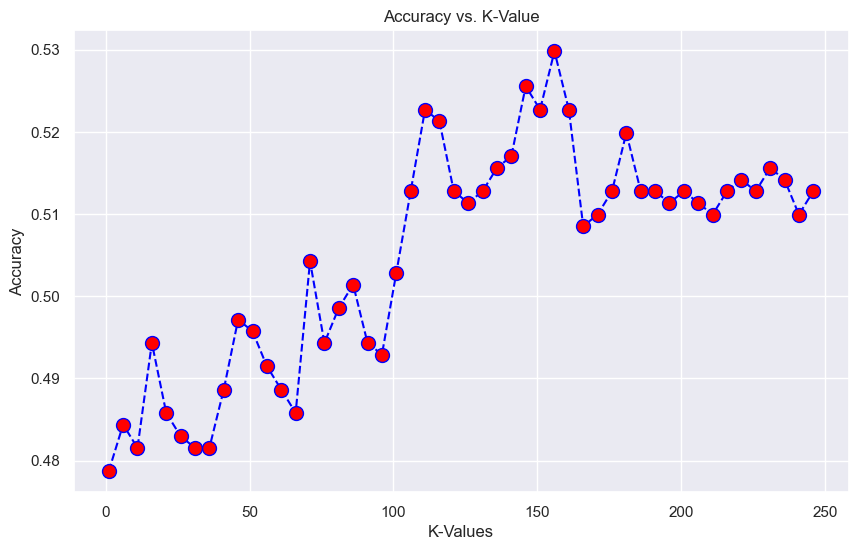

time: 795 ms (started: 2022-12-10 17:17:59 -08:00)


In [ ]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,250,5):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,250,5),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K-Value')
plt.xlabel('K-Values')
plt.ylabel('Accuracy')
print("Maximum accuracy:",max(acc),"at K =",acc.index(max(acc))*5)